# Assignment 2: Degree Distributions and Network Topology

In [180]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import pearsonr, ks_2samp, ttest_1samp
import math
import seaborn as sns

from typing import Tuple, List, Dict
from powerlaw import *

import warnings
warnings.filterwarnings("ignore")

# Change this to your GTID username
gtid = "jfunk33"

In [3]:
blog = nx.read_edgelist("blog.txt",create_using=nx.DiGraph())
blog_undirected = blog.to_undirected()

## Part 1  - Random Graphs and Correlations

### 1.1

In [9]:
def blog_graph_degree_adjacent_nodes(filename="blog.txt"):
    """
    Parse the blog.txt file into an undirected graph and then return the degree of adjacent nodes

    Input: filename

    Output: x, y node degree-degree pairs for edges in G
    """
    # This is a placeholder
    G = nx.read_edgelist(filename,create_using=nx.DiGraph())
    U = G.to_undirected()
    x, y = [], []
    for edge in U.edges():
        x.append(U.degree(edge[0]))  # Degree of the first node in the edge
        y.append(U.degree(edge[1]))  # Degree of the second node in the edge

    return x, y

In [13]:
def pearson_correlation_coefficient(x: List[float], y: List[float]) -> Tuple[float, float]:
    """
    Calculates the Pearson correlation coefficient between two vectors.

    Input: undirected graph G

    Output: Pearson correlation coefficient (r) and p-value
    """
    
    result = pearsonr(x, y)
    r, p = result.statistic, result.pvalue

    # your code here

    return r, p

def ttest(r,n):
    t = r * math.sqrt((n-2) / (1 - r**2))
    p = scipy.stats.t.sf(abs(t), df=n-1)
    return t,p

In [11]:
x,y = blog_graph_degree_adjacent_nodes()
r,p = pearson_correlation_coefficient(x,y)
print("r: ", r)
print("p: ", p)

r:  -0.04426889161551058
p:  1.0266706526771476e-08


In [49]:
t,pvalue = ttest(r, len(x))
print("t: ", t)
print("pvalue: ", pvalue)

t:  -5.729157983156141
pvalue:  5.133348031289044e-09


Based on the results of this test, is the network assortative, disassortative, or
neutral? Justify your answer and use a one sample t-test to evaluate whether your
answer is statistically significant.

Note: you can use the pearson_correlation_coefficient function you implemented above to help

Answer: Based on the results of this test, the network is disassortative. Higher-degree nodes tend to have lower degree neighbors because of the results of the test were negative meaning there was a slight negative correlation. The p-value that came from the t-test is 5.13e-09 which is a very small number close to zero, which is smaller than the threshold of 0.05 and still smaller than other standard thresholds like 0.01, indicating that the results of the test is statistically significant.

### 1.2 

In [135]:
def knn(G):
    degree_sequence = set(sorted((d for n, d in G.degree())))
    dmax = max(degree_sequence)
    degrees = dict(G.degree())
    k_knn = []
    for i in degree_sequence:
        avgs = []
        nodes = list({k for k in degrees if degrees[k]==i})
        for node in nodes:
            avg = sum([degrees[n] for n in G.neighbors(node)]) / len([degrees[n] for n in blog_undirected.neighbors(node)])
            avgs.append(avg)
        avg_of_avgs = sum(avgs)/len(avgs)
        k_knn.append(avg_of_avgs)
        
        
    return k_knn
        

In [37]:
# Plot the average neighbor degree (averaged across all nodes of degree k) as a 
# function of the node degree k in a scatter plot.

degree_sequence = sorted((d for n, d in blog_undirected.degree()))
dmax = max(degree_sequence)
print(dmax)

degree_dict = dict(blog_undirected.degree())

351


In [42]:
list(set(degree_sequence))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 110,
 111,
 112,
 114,
 116,
 117,
 118,
 120,
 121,
 122,
 123,
 125,
 128,
 129,
 130,
 133,
 136,
 137,
 138,
 143,
 144,
 147,
 149,
 170,
 171,
 179,
 182,
 196,
 199,
 211,
 218,
 223,
 243,
 274,
 277,
 301,
 306,
 351]

In [26]:
sum([degree_dict[n] for n in blog_undirected.neighbors('1')]) / len([degree_dict[n] for n in blog_undirected.neighbors('1')])



102.46153846153847

In [28]:
value = {i for i in degree_dict if degree_dict[i]==1}
list(value)


['1066',
 '1036',
 '470',
 '854',
 '996',
 '496',
 '628',
 '729',
 '717',
 '612',
 '257',
 '427',
 '639',
 '191',
 '468',
 '634',
 '731',
 '1176',
 '1133',
 '259',
 '357',
 '1159',
 '604',
 '435',
 '297',
 '1012',
 '1120',
 '507',
 '680',
 '708',
 '1043',
 '676',
 '1021',
 '1008',
 '1114',
 '1122',
 '1162',
 '341',
 '697',
 '944',
 '327',
 '693',
 '665',
 '556',
 '316',
 '542',
 '1221',
 '995',
 '355',
 '645',
 '1187',
 '1067',
 '1135',
 '1040',
 '443',
 '375',
 '647',
 '85',
 '679',
 '649',
 '641',
 '704',
 '923',
 '1171',
 '524',
 '555',
 '453',
 '616',
 '946',
 '571',
 '417',
 '528',
 '1130',
 '493',
 '1027',
 '397',
 '967',
 '705',
 '1077',
 '615',
 '530',
 '573',
 '465',
 '707',
 '1214',
 '56',
 '685',
 '1063',
 '711',
 '364',
 '724',
 '1049',
 '1223',
 '1212',
 '1019',
 '477',
 '428',
 '448',
 '657',
 '1188',
 '606',
 '971',
 '1100',
 '644',
 '901',
 '1014',
 '489',
 '442',
 '592',
 '972',
 '608',
 '1011',
 '718',
 '426',
 '1208',
 '506',
 '727',
 '1197',
 '706',
 '836',
 '720',


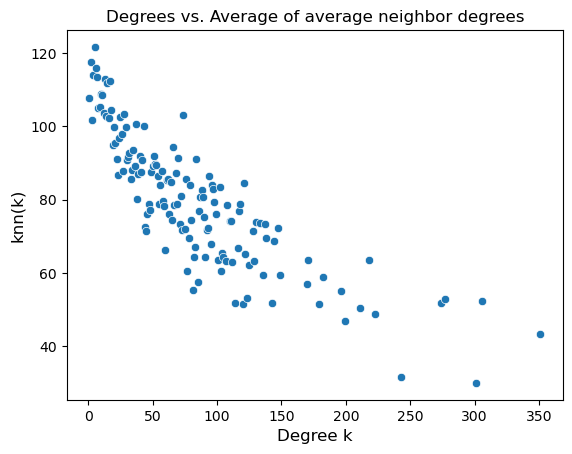

In [47]:
avg_knn = knn(blog_undirected)
sns.scatterplot(x=list(set(degree_sequence)), y=avg_knn)
plt.xlabel( "Degree k" , size = 12 )
plt.ylabel( "knn(k)" , size = 12 )
plt.title( "Degrees vs. Average of average neighbor degrees" , size = 12 )
plt.show()

In [50]:
r2,p2 = pearson_correlation_coefficient(list(set(degree_sequence)),avg_knn)
print("r: ", r2)
print("p: ", p2)

t2,pvalue2 = ttest(r2, len(list(set(degree_sequence))))
print("t: ", t2)
print("pvalue: ", pvalue2)

r:  -0.8320196166098809
p:  3.67251731483049e-38
t:  -17.872421331669155
pvalue:  1.4376935211518966e-38


Based on the results of this test, is the network assortative, disassortative, or
neutral? Justify your answer and use a one sample t-test to evaluate whether your
answer is statistically significant.

Note: you can use the pearson_correlation_coefficient function you implemented above to help

Answer: Based on the results of this second test, the network is disassortative. The plot clearly shows a negative trend in the data, the results of the pearson correlation coefficient is negative and close to -1. The results are statistically significant because after calculating the t test I got a p value of 1.44e-38 which is significantly below the threshold of 0.05 therefore I can reject the null hypothesis.

## Part 2 - Power-Law Distributions

### 2.1

In [51]:
blog.in_degree()

InDegreeView({'1': 12, '2': 68, '3': 263, '4': 57, '5': 337, '6': 165, '7': 8, '8': 114, '9': 117, '10': 45, '11': 268, '12': 140, '13': 87, '14': 82, '15': 220, '16': 19, '17': 5, '18': 19, '19': 34, '20': 24, '21': 1, '22': 86, '23': 72, '24': 80, '25': 27, '26': 66, '27': 118, '28': 18, '29': 3, '30': 45, '31': 6, '32': 101, '33': 39, '34': 25, '35': 51, '36': 33, '37': 24, '38': 68, '39': 24, '40': 96, '41': 31, '42': 75, '43': 72, '44': 41, '45': 33, '46': 63, '47': 59, '48': 62, '49': 104, '50': 73, '51': 128, '52': 1, '53': 103, '54': 1, '55': 187, '56': 0, '57': 16, '58': 19, '59': 26, '60': 10, '61': 14, '62': 1, '63': 23, '64': 39, '65': 10, '66': 20, '67': 3, '68': 43, '69': 75, '70': 12, '71': 22, '72': 61, '73': 0, '74': 33, '75': 70, '76': 112, '77': 82, '78': 1, '79': 77, '80': 80, '81': 37, '82': 28, '83': 112, '84': 55, '85': 0, '86': 76, '87': 1, '88': 15, '89': 48, '90': 100, '91': 109, '92': 2, '93': 48, '94': 201, '95': 27, '96': 47, '97': 75, '98': 32, '99': 101, 

## Plot the in-degree distribution

In [65]:
in_degree_sequence = sorted([d for n, d in blog.in_degree()])  # degree sequence
# print "Degree sequence", degree_sequence
inDegreeCount = collections.Counter(in_degree_sequence)
deg, cnt = zip(*inDegreeCount.items())
deg = list(deg)
cnt = list(cnt)
N = len(list(blog.nodes()))
p_k = []

for i in cnt:
    p_k.append(i / N)

In [69]:
len(p_k)

119

In [70]:
sum(p_k)

0.999999999999999

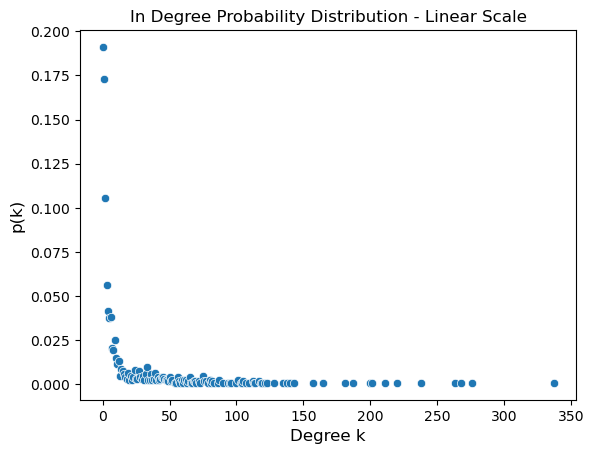

In [80]:
sns.scatterplot(x = deg, y = p_k)
plt.xlabel( "Degree k" , size = 12 )
plt.ylabel( "p(k)" , size = 12 )
plt.title( "In Degree Probability Distribution - Linear Scale" , size = 12 )
plt.show()

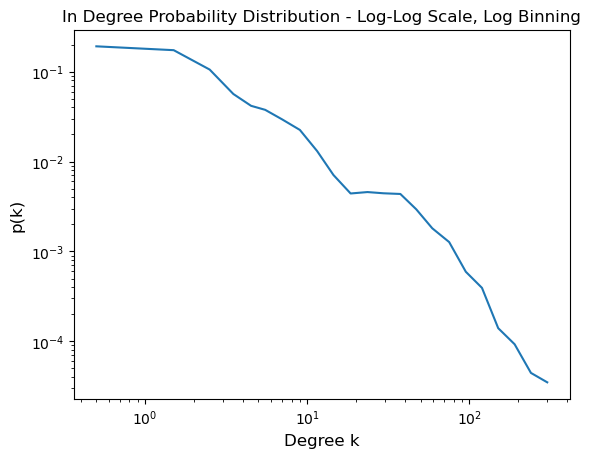

In [81]:
powerlaw.plot_pdf(in_degree_sequence)
plt.xlabel( "Degree k" , size = 12 )
plt.ylabel( "p(k)" , size = 12 )
plt.title( "In Degree Probability Distribution - Log-Log Scale, Log Binning" , size = 12 )
plt.show()

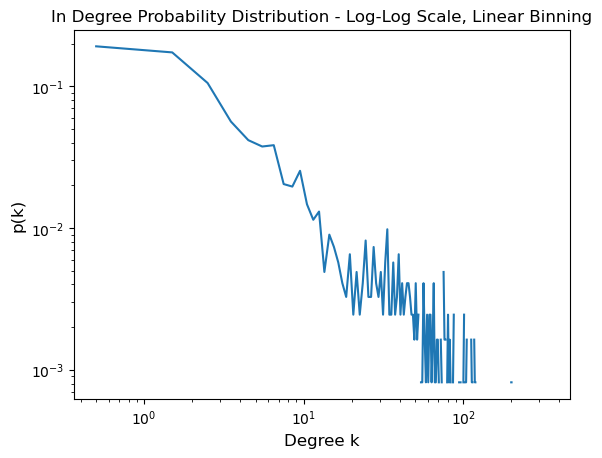

In [82]:
powerlaw.plot_pdf(in_degree_sequence, linear_bins=True)
plt.xlabel( "Degree k" , size = 12 )
plt.ylabel( "p(k)" , size = 12 )
plt.title( "In Degree Probability Distribution - Log-Log Scale, Linear Binning" , size = 12 )
plt.show()

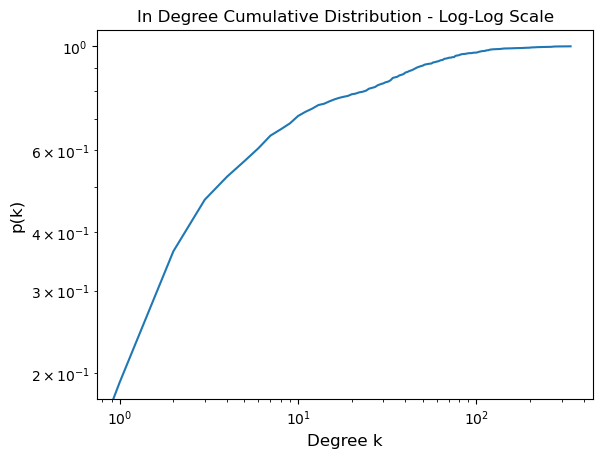

In [84]:
powerlaw.plot_cdf(in_degree_sequence)
plt.xlabel( "Degree k" , size = 12 )
plt.ylabel( "p(k)" , size = 12 )
plt.title( "In Degree Cumulative Distribution - Log-Log Scale" , size = 12 )
plt.show()

## Plot the out-degree distribution

In [85]:
out_degree_sequence = sorted([d for n, d in blog.out_degree()])  # degree sequence
# print "Degree sequence", degree_sequence
outDegreeCount = collections.Counter(out_degree_sequence)
degOut, cntOut = zip(*outDegreeCount.items())
degOut = list(degOut)
cntOut = list(cntOut)
N = len(list(blog.nodes()))
p_k_out = []

for i in cntOut:
    p_k_out.append(i / N)

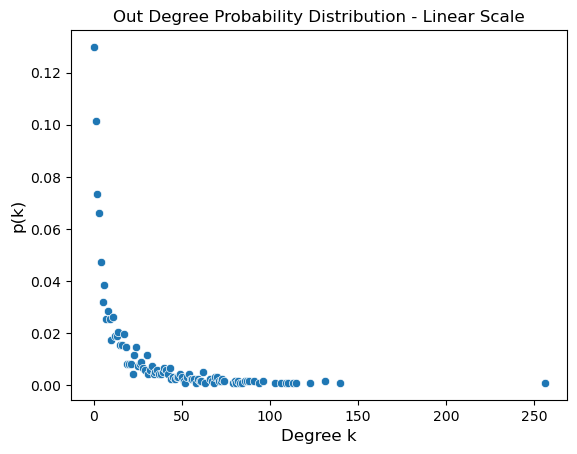

In [86]:
sns.scatterplot(x = degOut, y = p_k_out)
plt.xlabel( "Degree k" , size = 12 )
plt.ylabel( "p(k)" , size = 12 )
plt.title( "Out Degree Probability Distribution - Linear Scale" , size = 12 )
plt.show()

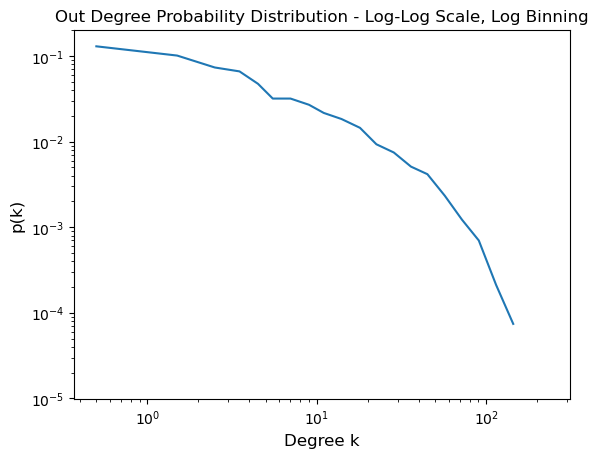

In [87]:
powerlaw.plot_pdf(out_degree_sequence)
plt.xlabel( "Degree k" , size = 12 )
plt.ylabel( "p(k)" , size = 12 )
plt.title( "Out Degree Probability Distribution - Log-Log Scale, Log Binning" , size = 12 )
plt.show()

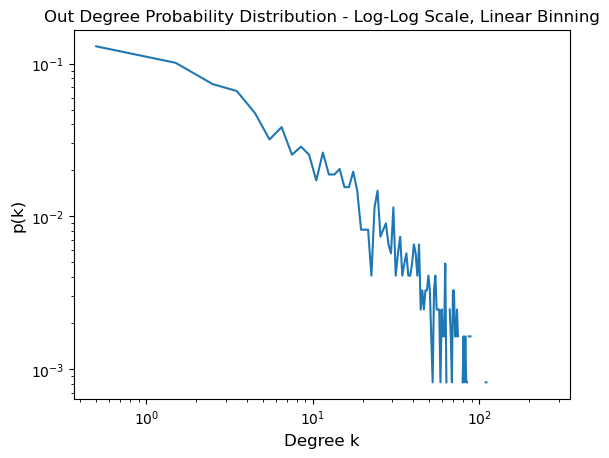

In [93]:
powerlaw.plot_pdf(out_degree_sequence, linear_bins=True)
plt.xlabel( "Degree k" , size = 12 )
plt.ylabel( "p(k)" , size = 12 )
plt.title( "Out Degree Probability Distribution - Log-Log Scale, Linear Binning" , size = 12 )
plt.show()

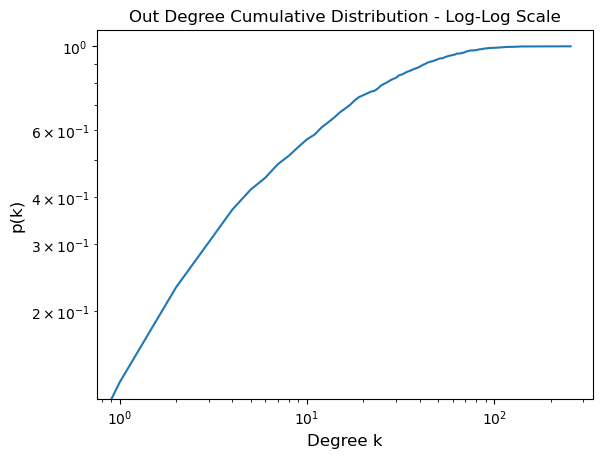

In [89]:
powerlaw.plot_cdf(out_degree_sequence)
plt.xlabel( "Degree k" , size = 12 )
plt.ylabel( "p(k)" , size = 12 )
plt.title( "Out Degree Cumulative Distribution - Log-Log Scale" , size = 12 )
plt.show()

### 2.2

In [105]:
#fit the in-degree distributon without xmax
fit_in1 = powerlaw.Fit(in_degree_sequence, discrete=True)
fit_in1.xmin, fit_in1.power_law.alpha, fit_in1.power_law.D

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


(61.0, 3.0751740251952384, 0.0780209526426131)

In [106]:
#fit the in-degree distributon with xmax = 300
fit_in2 = powerlaw.Fit(in_degree_sequence, discrete=True, xmax=300)
fit_in2.xmin, fit_in2.power_law.alpha, fit_in2.power_law.D

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


(31.0, 2.191935936622535, 0.04731997478168795)

In [108]:
# Fit the out-degree distributon without xmax
fit_out1 = powerlaw.Fit(out_degree_sequence, discrete=True)
fit_out1.xmin, fit_out1.power_law.alpha, fit_out1.power_law.D

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


(79.0, 5.28651205623829, 0.0516797901802466)

In [109]:
# Fit the out-degree distributon with xmax = 200
fit_out2 = powerlaw.Fit(out_degree_sequence, discrete=True, xmax=200)
fit_out2.xmin, fit_out2.power_law.alpha, fit_out2.power_law.D

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


(35.0, 2.90106495528127, 0.06658674591524583)

## Part 3 - The Small-World Property

### Clustering Coefficient and Transitivity 
### 3.1

In [114]:
def largest_scc(filename="blog.txt") -> nx.Graph:
    """
    Returns the largest strongly connected component of a directed graph.

    Input: filename for graph data

    Output: largest strongly connected component of G as an undirected graph.
    """
    # This is a placeholder
    # your code here
    G = nx.read_edgelist(filename,create_using=nx.DiGraph())
    largest_scc = max(nx.strongly_connected_components(G), key=len)
    largest_scc = G.subgraph(largest_scc)
    largest_scc = largest_scc.to_undirected()

    return largest_scc

In [115]:
G0 = largest_scc()

### 3.2

In [116]:
def clustering_coeff(G: nx.Graph) -> Dict[int, float]:
    """
    Calculates the average clustering coefficient of a graph.

    Input: undirected graph G

    Output: average clustering coefficient of G
    """
    # This is a placeholder. It _can_ be deleted or modified.
    acc_dict = nx.clustering(G)

    # your code here

    # the return object should be a dict where each key is a node in the graph and the value is the clustering coefficient of that node.
    return acc_dict

In [117]:
clustering_coefficients = clustering_coeff(G0)
clustering_coefficients

{'1': 0.4505928853754941,
 '2': 0.3125548726953468,
 '3': 0.1724125495852867,
 '4': 0.31059506531204645,
 '5': 0.12109459168282698,
 '6': 0.19658375786634702,
 '8': 0.21868552903035662,
 '9': 0.21621621621621623,
 '10': 0.26179463459759483,
 '11': 0.1574295169871392,
 '12': 0.26356589147286824,
 '13': 0.37989886219974717,
 '14': 0.32947612034504525,
 '15': 0.12010050251256281,
 '16': 0.42795698924731185,
 '17': 0.42160278745644597,
 '18': 0.5507936507936508,
 '19': 0.3526570048309179,
 '20': 0.3333333333333333,
 '22': 0.3673197387711582,
 '23': 0.3622163277335691,
 '25': 0.4123076923076923,
 '26': 0.4318873668188737,
 '27': 0.3078387813392574,
 '28': 0.3731060606060606,
 '29': 0.4057971014492754,
 '31': 0.26666666666666666,
 '32': 0.27196467991169976,
 '33': 0.4223776223776224,
 '34': 0.47333333333333333,
 '35': 0.37902097902097903,
 '36': 0.40998217468805703,
 '37': 0.31560490940970193,
 '38': 0.350547730829421,
 '39': 0.2648221343873518,
 '40': 0.3288335064035999,
 '41': 0.4378531073

Plot the C-CDF of the clustering coefficients below

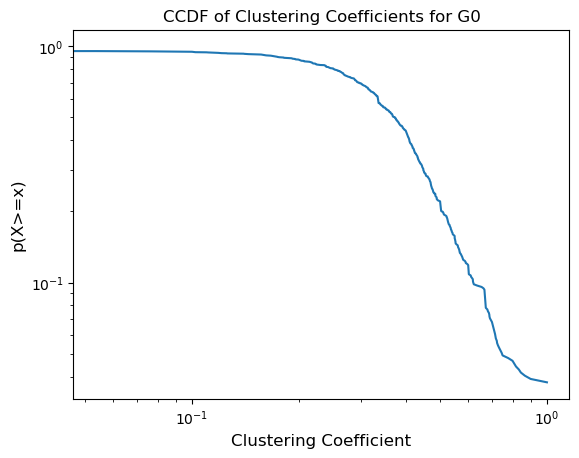

In [125]:
powerlaw.plot_ccdf(list(clustering_coefficients.values()))
plt.xlabel( "Clustering Coefficient" , size = 12 )
plt.ylabel( "p(X>=x)" , size = 12 )
plt.title( "CCDF of Clustering Coefficients for G0" , size = 12 )
plt.show()

In [126]:
def define_n_p(G: nx.Graph):
    """
    Determine n and p values for a graph

    Input: Undirected graph, G

    Output: n (number of nodes), p (probability of an edge)
    """
    # This is a placeholder. It should be modified.
    n, p = len(G.nodes()), nx.density(G)

    # your code here

    return n, p

In [127]:
def create_gnp(n: int, p: float) -> nx.Graph:
    """
    Creates a random graph with n nodes and edge probability p.

    Input: n (number of nodes), p (probability of an edge)

    Output: a random graph with n nodes and edge probability p
    """
    # This is a placeholder. It should be modified.
    G_r = nx.fast_gnp_random_graph(n,p)

    # your code here

    return G_r

In [131]:
n,p = define_n_p(G0)
gnp = create_gnp(n,p)
cc = clustering_coeff(gnp)

Plot the C-CDF for the random G(n,p) network below

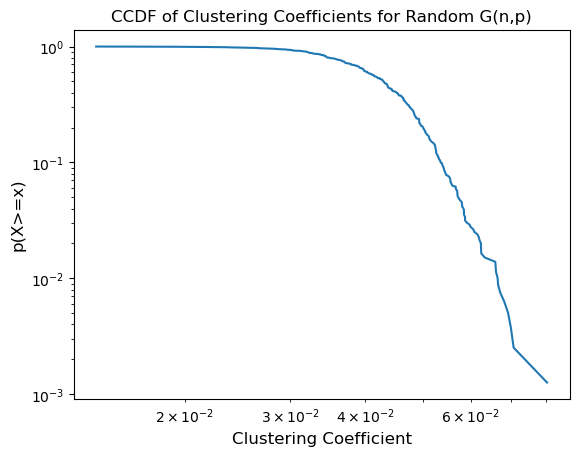

In [132]:
powerlaw.plot_ccdf(list(cc.values()))
plt.xlabel( "Clustering Coefficient" , size = 12 )
plt.ylabel( "p(X>=x)" , size = 12 )
plt.title( "CCDF of Clustering Coefficients for Random G(n,p)" , size = 12 )
plt.show()

### 3.3

In [134]:
ks_2samp(list(clustering_coefficients.values()), list(cc.values()))

KstestResult(statistic=0.9508196721311475, pvalue=0.0, statistic_location=0.07076923076923076, statistic_sign=-1)

* The KS test statistic is 0.9508196721311475, indicating a relatively large discrepancy between the two samples' distributions.
* The p-value is reported as 0.0, indicating strong evidence against the null hypothesis. This suggests that the two samples are significantly different from each other.
* The maximum discrepancy between the two CDFs occurs at a location represented by the statistic_location value of 0.07076923076923076.
* The negative sign of the statistic_sign value (-1) suggests that the first sample's empirical distribution is consistently lower than the second sample's empirical distribution.

### 3.4

In [145]:
def avg_clustering_coeff(G: nx.Graph):
    cc = clustering_coeff(G)
    degree_sequence = set(sorted((d for n, d in G.degree())))
    degrees = dict(G.degree())
    avg_coeff = []
    for i in degree_sequence:
        nodes = list({k for k in degrees if degrees[k]==i})
        avg = sum([cc[n] for n in nodes]) / len([cc[n] for n in nodes])
        avg_coeff.append(avg)
        
    return avg_coeff
    

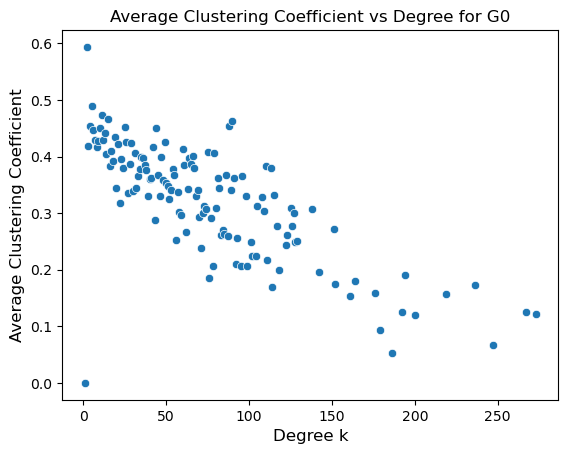

In [149]:
G0_avg_cc = avg_clustering_coeff(G0)
sns.scatterplot(x=list(set(sorted((d for n, d in G0.degree())))), y=G0_avg_cc)
plt.xlabel( "Degree k" , size = 12 )
plt.ylabel( "Average Clustering Coefficient" , size = 12 )
plt.title( "Average Clustering Coefficient vs Degree for G0" , size = 12 )
plt.show()

There is a negative correlation between the degree of a node and the average clustering coefficient. As the degree increases, the average clustering coefficient decreases.

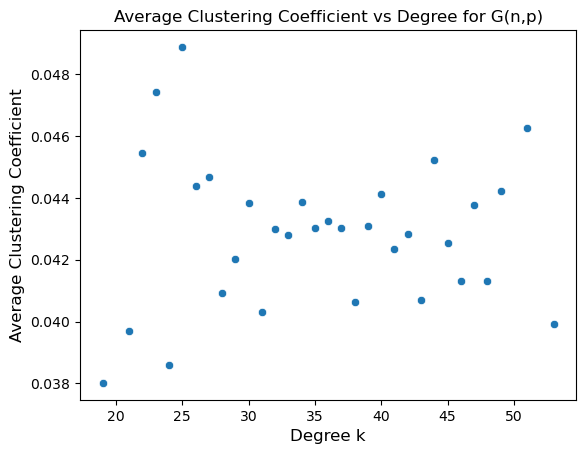

In [150]:
gnp_avg_cc = avg_clustering_coeff(gnp)
sns.scatterplot(x=list(set(sorted((d for n, d in gnp.degree())))), y=gnp_avg_cc)
plt.xlabel( "Degree k" , size = 12 )
plt.ylabel( "Average Clustering Coefficient" , size = 12 )
plt.title( "Average Clustering Coefficient vs Degree for G(n,p)" , size = 12 )
plt.show()

There is no relationship between the degree of a node and the average clustering coefficient. It is a random scatterplot, which makes sense because it was for a random graph.

### 3.5

In [164]:
n,p = define_n_p(G0)
gnp_100 = []
gnp_100_transitivity = []
for i in np.arange(1,101):
    g = create_gnp(n,p)
    gnp_100_transitivity.append(nx.transitivity(g))
    gnp_100.append(g)

In [165]:
gnp_100_transitivity

[0.0431119193607911,
 0.042840895551487713,
 0.04345487815763635,
 0.043985915029453385,
 0.04237802235895658,
 0.04413807228761433,
 0.04343698986704352,
 0.04234220053518023,
 0.043157681264609504,
 0.042723587434472014,
 0.04292267801342996,
 0.04324035164608523,
 0.04286686623185246,
 0.04272466475415305,
 0.042133065306701946,
 0.04252570370636661,
 0.042958376061633934,
 0.04368029345209539,
 0.04175730040768365,
 0.042456116294859576,
 0.04290143595986845,
 0.042542803942050046,
 0.04334869078464491,
 0.04248857019416161,
 0.04285881344039916,
 0.042832891640758645,
 0.04282201213181048,
 0.04235057632344182,
 0.04316347200061929,
 0.04327837973246405,
 0.04191415093287535,
 0.04310687806497135,
 0.04215160431807981,
 0.04249670053234364,
 0.04477260430921995,
 0.04253612080493135,
 0.04262130478438327,
 0.04184534671532847,
 0.042719414526983066,
 0.04210833782994341,
 0.043432459655249764,
 0.04267871852527996,
 0.04219037476725109,
 0.04237724182738638,
 0.04307423671380658,


In [166]:
G0_transitivity = nx.transitivity(G0)
G0_transitivity

0.26305148321472194

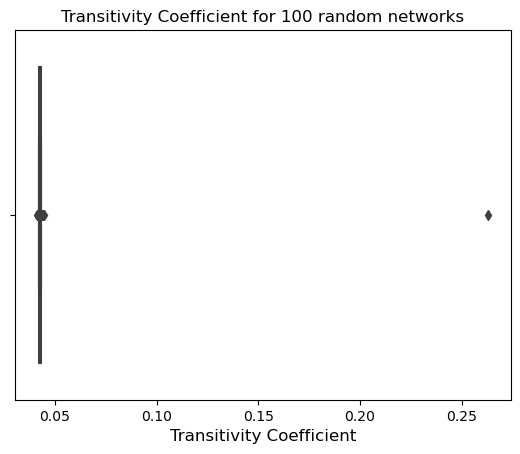

In [217]:
sns.boxplot(x=gnp_100_transitivity, whis=G0_transitivity)
plt.xlabel( "Transitivity Coefficient" , size = 12 )
plt.title( "Transitivity Coefficient for 100 random networks" , size = 12 )
plt.show()

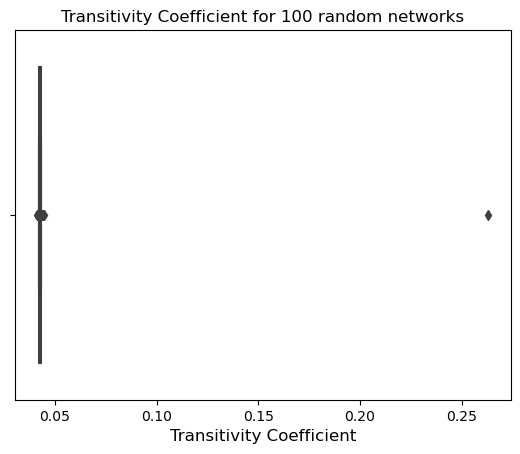

In [216]:
transitivity_all = gnp_100_transitivity.append(G0_transitivity)
sns.boxplot(x=gnp_100_transitivity, whis=G0_transitivity)
plt.xlabel( "Transitivity Coefficient" , size = 12 )
plt.title( "Transitivity Coefficient for 100 random networks" , size = 12 )
plt.show()

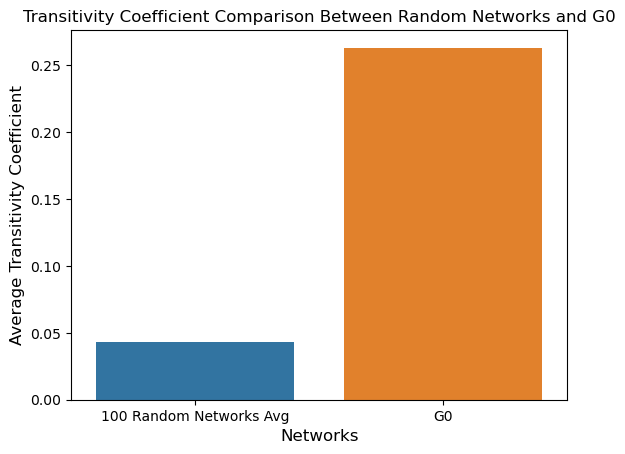

In [173]:
sns.barplot(x=['100 Random Networks Avg', 'G0'], y=[sum(gnp_100_transitivity)/len(gnp_100_transitivity), G0_transitivity])
plt.xlabel( "Networks" , size = 12 )
plt.ylabel( "Average Transitivity Coefficient" , size = 12 )
plt.title( "Transitivity Coefficient Comparison Between Random Networks and G0" , size = 12 )
plt.show()

### CPL/ASPL and Diameter
### 3.6 

In [169]:
avg_shortest_path = []
diameter = []
for g in gnp_100:
    avg_shortest_path.append(nx.average_shortest_path_length(g))
    diameter.append(nx.diameter(g))

In [174]:
G0_avg_shortest_path = nx.average_shortest_path_length(G0)
G0_diameter = nx.diameter(G0)

avg_shortest_path.append(G0_avg_shortest_path)
diameter.append()

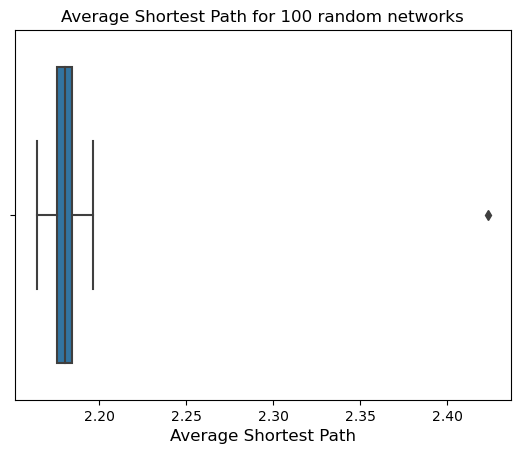

In [213]:
sns.boxplot(x=avg_shortest_path)
plt.xlabel( "Average Shortest Path" , size = 12 )
plt.title( "Average Shortest Path for 100 random networks" , size = 12 )
plt.show()

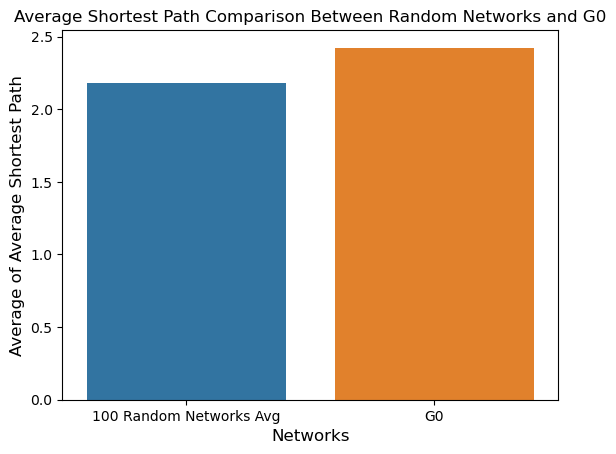

In [176]:
sns.barplot(x=['100 Random Networks Avg', 'G0'], y=[sum(avg_shortest_path)/len(avg_shortest_path), G0_avg_shortest_path])
plt.xlabel( "Networks" , size = 12 )
plt.ylabel( "Average of Average Shortest Path" , size = 12 )
plt.title( "Average Shortest Path Comparison Between Random Networks and G0" , size = 12 )
plt.show()

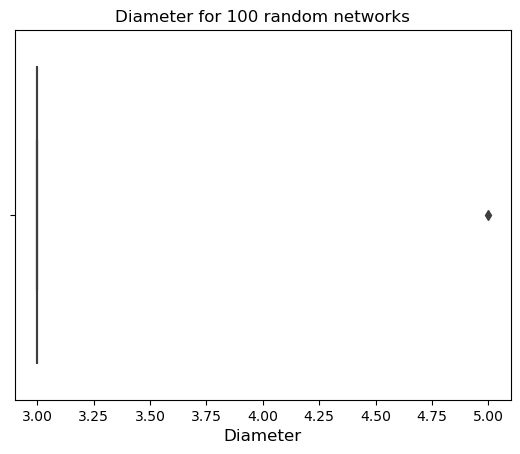

In [215]:
sns.boxplot(x=diameter)
plt.xlabel( "Diameter" , size = 12 )
plt.title( "Diameter for 100 random networks" , size = 12 )
plt.show()

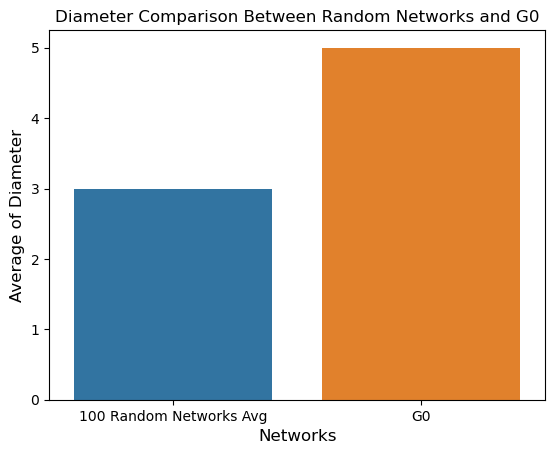

In [179]:
sns.barplot(x=['100 Random Networks Avg', 'G0'], y=[sum(diameter)/len(diameter), G0_diameter])
plt.xlabel( "Networks" , size = 12 )
plt.ylabel( "Average of Diameter" , size = 12 )
plt.title( "Diameter Comparison Between Random Networks and G0" , size = 12 )
plt.show()

### 3.7

T test for average shortest path:

In [183]:
ttest_1samp(avg_shortest_path, popmean=G0_avg_shortest_path), scipy.stats.t.sf(abs(-374.4355771653298), df=99)

(TtestResult(statistic=-374.4355771653298, pvalue=8.08369635366072e-158, df=99),
 4.04184817683036e-158)

In [184]:
ttest_1samp(diameter, popmean=G0_diameter)

TtestResult(statistic=-inf, pvalue=0.0, df=99)

Both the results from the T test for average shortest path and the diameter indicates that it is statistically significant because of the extremely low P value.

### Small World Property 
### 3.8
Based on your findings in 3.1-3.7, can you conclude that G0 is a small-world network? Explain which metrics you used and how they support your conclusion. 


## Part 4 - Motifs 

### 4.1

In [188]:
def blog_graph_scc(filename="blog.txt") -> nx.DiGraph():
    """
    Parse the blog.txt file and find the largest strongly connected component and convert to a directed graph.

    Input: filename

    Output: scc, your largest strongly connected component as a directed graph
    """
    # This is a placeholder
    G = nx.read_edgelist(filename,create_using=nx.DiGraph())
    scc = max(nx.strongly_connected_components(G), key=len)
    scc = G.subgraph(scc)
    
    return scc

In [189]:
G1 = blog_graph_scc()

In [192]:
def count_type_5(scc: nx.DiGraph) -> int:
    """
    Counts the number of type 5 motifs in a graph.
    A type 5 motif is a feed-forward loop: A->B->C with the additional edge A->C

    Input: directed graph scc

    Output: number of type 5 nodes in scc
    """

    # your code here
    triads = nx.triadic_census(scc)
    type_5 = triads['030T']

    return type_5

In [199]:
count_type_5(G1)

39721

In [193]:
def count_type_9(scc: nx.DiGraph) -> int:
    """
    Counts the number of type 9 motifs in a graph.
    A type 9 motif is a directed cycle: A->B->C->A

    Input: directed graph scc

    Output: number of type 9 nodes in scc
    """

    # your code here
    triads = nx.triadic_census(scc)
    type_9 = triads['030C']

    return type_9

In [200]:
count_type_9(G1)

481

### 4.2

In [198]:
din = list(d for n, d in G1.in_degree())
dout = list(d for n, d in G1.out_degree())
random_10 = []
for i in np.arange(1,11):
    r = nx.directed_configuration_model(din, dout)
    r = nx.DiGraph(r)
    r.remove_edges_from(nx.selfloop_edges(r))
    random_10.append(r)

In [218]:
type_5_results = []
type_9_results = []
for g in random_10:
    type_5_results.append(count_type_5(g))
    type_9_results.append(count_type_9(g))
    
type_5_results.append(count_type_5(G1))
type_9_results.append(count_type_9(G1))

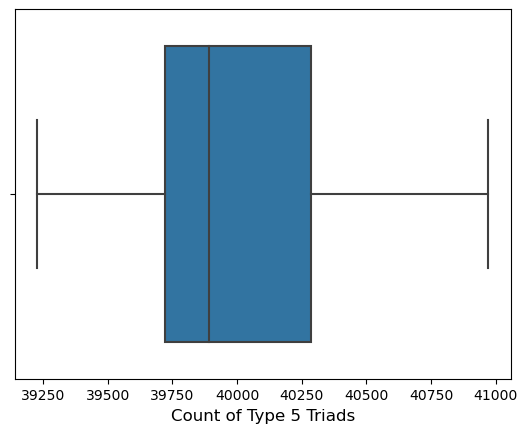

In [219]:
sns.boxplot(x=type_5_results)
plt.xlabel( "Count of Type 5 Triads" , size = 12 )
plt.show()

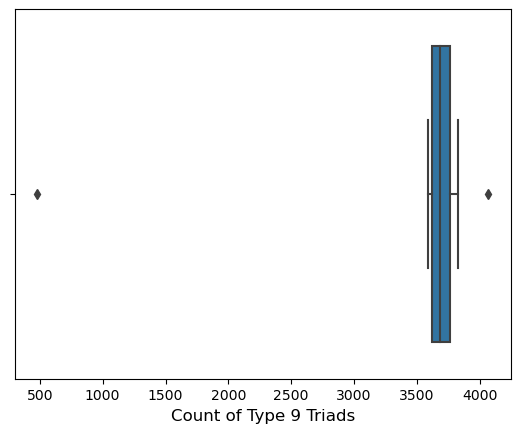

In [220]:
sns.boxplot(x=type_9_results)
plt.xlabel( "Count of Type 9 Triads" , size = 12 )
plt.show()

Which of the previous triplet types are statistically more common (or less common) in the emperical compared to what we would expect based on chance?

ANSWER: The type 9 triad is statistically less common in the emperical compared to the random networks. As can be seen in the second boxplot, the outlier on the left hand side of the plot only had around 500 instances of type 9 triad while all the random networks had significantly more between 3500 and 4000

## Part 5 - Transitivity and the Average Clustering Coefficient

## Submission Script

In [223]:
# DO NOT EDIT THIS CELL
import inspect
import json

def export_assignment():
    functions = []
    answers = []
    
    # Part 1
    # 1.1
    if blog_graph_degree_adjacent_nodes and callable(blog_graph_degree_adjacent_nodes):
        x, y = blog_graph_degree_adjacent_nodes(filename="blog.txt")
        functions.append(inspect.getsource(blog_graph_degree_adjacent_nodes))
    if pearson_correlation_coefficient and callable(pearson_correlation_coefficient):
        r, p = pearson_correlation_coefficient(x,y)
        functions.append(inspect.getsource(pearson_correlation_coefficient))
        answers.append([r, p])
    
    # Part 3
    # 3.1
    if largest_scc and callable(largest_scc):
        l_scc = largest_scc(filename="blog.txt")
        functions.append(inspect.getsource(largest_scc))
    
    # 3.2
    if clustering_coeff and callable(clustering_coeff):
        acc_dict = clustering_coeff(l_scc)
        functions.append(inspect.getsource(clustering_coeff))

    if define_n_p and callable(define_n_p):
        n, p = define_n_p(l_scc)
        functions.append(inspect.getsource(define_n_p))
        answers.append([n, p])

    if create_gnp and callable(create_gnp):
        G_r = create_gnp(n, p)
        functions.append(inspect.getsource(create_gnp))
    
    
    # Part 4

    # 4.1
    if blog_graph_scc and callable(blog_graph_scc):
        scc = blog_graph_scc(filename="blog.txt")
        functions.append(inspect.getsource(blog_graph_scc))

    if count_type_5 and callable(count_type_5):
        type_5 = count_type_5(scc)
        functions.append(inspect.getsource(count_type_5))
        answers.append([type_5])
        
    if count_type_9 and callable(count_type_9):
        type_9 = count_type_9(scc)
        functions.append(inspect.getsource(count_type_9))
        answers.append([type_9])    

    
    with open(f"{gtid}_A2_answers.json", 'w') as ans:
        json.dump(answers, ans, indent=2)
        
    with open(f"{gtid}_A2.py", 'w') as funcs:
        funcs.write('\n'.join(functions))
        
      

In [224]:
export_assignment()